# Homework 5, Part 2: Answer questions with pandas

**Use the Excel file to answer the following questions.** This is a little more typical of what your data exploration will look like with pandas.

## 0) Setup

Import pandas **with the correct name** .

In [4]:
import pandas as pd
!pip install openpyxl

## 1) Reading in an Excel file

Use pandas to read in the `richpeople.xlsx` Excel file, saving it as a variable with the name we'll always use for a dataframe.

> **TIP:** You will use `read_excel` instead of `read_csv`. Trying `read_excel` the first time will probably not work, you'll get an error message. Be sure to read the error carefully: *you probably need to install a new library before it will work, and the error tells you what the library is named*.

In [5]:
df = pd.read_excel("richpeople.xlsx")
df.head()

,year,name,rank,citizenship,countrycode,networthusbillion,selfmade,typeofwealth,gender,age,...,relationshiptocompany,foundingdate,gdpcurrentus,sourceofwealth,notes,notes2,source,source_2,source_3,source_4
0,2014,A. Jerrold Perenchio,663,United States,USA,2.6,self-made,executive,male,83.0,...,former chairman and CEO,1955.0,NaN,"television, Univision",represented Marlon Brando and Elizabeth Taylor,NaN,http://en.wikipedia.org/wiki/Jerry_Perenchio,http://www.forbes.com/profile/a-jerrold-perenc...,COLUMN ONE; A Hollywood Player Who Owns the Ga...,NaN
1,2014,Abdulla Al Futtaim,687,United Arab Emirates,ARE,2.5,inherited,inherited,male,NaN,...,relation,1930.0,NaN,"auto dealers, investments",company split between him and cousin in 2000,NaN,http://en.wikipedia.org/wiki/Al-Futtaim_Group,http://www.al-futtaim.ae/content/groupProfile.asp,NaN,NaN
2,2014,Abdulla bin Ahmad Al Ghurair,305,United Arab Emirates,ARE,4.8,inherited,inherited,male,NaN,...,relation,1960.0,NaN,diversified,inherited from father,NaN,http://en.wikipedia.org/wiki/Al-Ghurair_Group,http://www.alghurair.com/about-us/our-history,NaN,NaN
3,2014,Abdullah Al Rajhi,731,Saudi Arabia,SAU,2.4,self-made,self-made finance,male,NaN,...,founder,1957.0,NaN,banking,NaN,NaN,http://en.wikipedia.org/wiki/Al-Rajhi_Bank,http://www.alrajhibank.com.sa/ar/investor-rela...,http://www.alrajhibank.com.sa/ar/about-us/page...,NaN
4,2014,Abdulsamad Rabiu,1372,Nigeria,NGA,1.2,self-made,founder non-finance,male,54.0,...,founder,1988.0,NaN,"sugar, flour, cement",NaN,NaN,http://www.forbes.com/profile/abdulsamad-rabiu/,http://www.bloomberg.com/research/stocks/priva...,NaN,NaN


## 2) Checking your data

Display the number of rows and columns in your data. Also display the names and data types of each column.

In [6]:
df.shape

(1653, 30)

In [7]:
print(f"Number of rows:{df.shape[0]}")  

Number of rows:1653


In [8]:
print(f"Number of columns:{df.shape[1]}")

Number of columns:30


## 3) Who are the top 10 richest billionaires? Use the `networthusbillion` column.

In [10]:
top_10_richest = df.sort_values('networthusbillion', ascending=False)
top_10_richest.head(10).name

184           Bill Gates
226     Carlos Slim Helu
79        Amancio Ortega
1562      Warren Buffett
862        Larry Ellison
339           David Koch
247         Charles Koch
1364     Sheldon Adelson
280       Christy Walton
724           Jim Walton
Name: name, dtype: object

## 4) How many male billionaires are there compared to the number of female billionares? What percent is that? Do they have a different average wealth?

> **TIP:** The last part uses `groupby`, but the count/percent part does not.
> **TIP:** When I say "average," you can pick what kind of average you use.

In [11]:
female_count = df.gender.value_counts()['female']
print("female:", female_count)

male_count = df.gender.value_counts()['male']
print("male:",  male_count)

total_count = male_count + female_count
print("total", total_count)

female: 180
male: 1473
total 1653


In [12]:
percent_of_female = female_count/total_count *100
print(f"female: {percent_of_female:.2f}%")

percent_of_male = male_count/total_count *100
print(f"male: {percent_of_male:.2f}%")

female: 10.89%
male: 89.11%


In [13]:
average_wealth = df.groupby("gender").mean()['networthusbillion']
average_wealth

gender
female    3.920556
male      3.902716
Name: networthusbillion, dtype: float64

In [14]:
print("they have a similar average wealth")

they have a similar average wealth


## 5) What is the most common source/type of wealth? Is it different between males and females?

> **TIP:** You know how to `groupby` and you know how to count how many times a value is in a column. Can you put them together???
> **TIP:** Use percentages for this, it makes it a lot more readable.

In [15]:
wealth_source = df.groupby("sourceofwealth")['sourceofwealth'].count().sort_values(ascending= False)
wealth_source


sourceofwealth
real estate                107
diversified                 69
retail                      63
investments                 60
pharmaceuticals             42
                          ... 
cement, airport              1
cement firm inheritance      1
casinos, real estate         1
casinos, investments         1
wrestling                    1
Name: sourceofwealth, Length: 615, dtype: int64

In [17]:
df.groupby(by='gender').sourceofwealth.value_counts()


gender  sourceofwealth
female  diversified       9
        real estate       7
        media             6
        construction      5
        consumer goods    5
                         ..
male    web hosting       1
        wind turbines     1
        wine              1
        winter jackets    1
        wrestling         1
Name: sourceofwealth, Length: 677, dtype: int64

## 6) What companies have the most billionaires? Graph the top 5 as a horizontal bar graph.

> **TIP:** First find the answer to the question, then just try to throw `.plot()` on the end
>
> **TIP:** You can use `.head()` on *anything*, not just your basic `df`
>
> **TIP:** You might feel like you should use `groupby`, but don't! There's an easier way to count.
>
> **TIP:** Make the largest bar be at the top of the graph
>
> **TIP:** If your chart seems... weird, think about where in the process you're sorting vs using `head`

<AxesSubplot:>

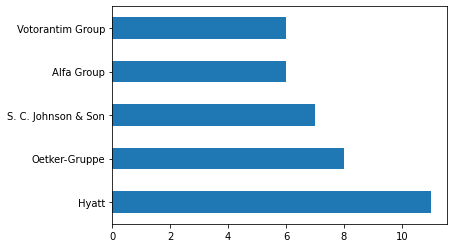

In [28]:
df.company.value_counts().head().plot(kind = 'barh')

## 7) How much money do these billionaires have in total?

In [40]:
df.networthusbillion.sum().round(2)

6454.4

## 8) What are the top 10 countries with the most money held by billionaires?

I am **not** asking which country has the most billionaires - this is **total amount of money per country.**

> **TIP:** Think about it in steps - "I want them organized by country," "I want their net worth," "I want to add it all up," and "I want 10 of them." Just chain it all together.

In [62]:
df.groupby('countrycode').sum('networthusbillion').networthusbillion.sort_values(ascending = False).head(10)

countrycode
USA    2322.4
RUS     422.5
DEU     401.4
CHN     375.8
FRA     235.3
HKG     213.7
BRA     192.2
IND     191.9
ITA     158.1
GBR     152.0
Name: networthusbillion, dtype: float64

## 9) How old is an average billionaire? How old are self-made billionaires  vs. non self-made billionaires? 

In [75]:
df.age.mean()

63.34213836477988

In [70]:
df.groupby('selfmade').mean('age').age

selfmade
inherited    64.962185
self-made    62.625899
Name: age, dtype: float64

## 10) Who are the youngest billionaires? Who are the oldest? Make a graph of the distribution of ages.

> **TIP:** You use `.plot()` to graph values in a column independently, but `.hist()` to draw a [histogram](https://www.mathsisfun.com/data/histograms.html) of the distribution of their values

In [85]:
print("Youngest")
df.sort_values('age').name.head()

Youngest


1172            Perenna Kei
397        Dustin Moskovitz
1004        Mark Zuckerberg
127     Anton Kathrein, Jr.
394            Drew Houston
Name: name, dtype: object

In [84]:
print("Oldest")
df.sort_values('age', ascending= False).name.head()

Oldest


343    David Rockefeller, Sr.
816             Karl Wlaschek
836            Kirk Kerkorian
588             Henry Hillman
435        Erika Pohl-Stroher
Name: name, dtype: object

<AxesSubplot:>

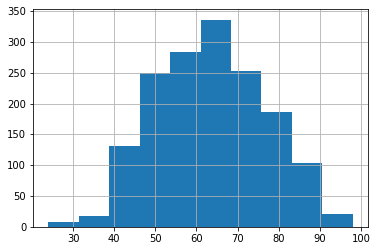

In [77]:
df.age.hist()

## 11) Make a scatterplot of net worth compared to age

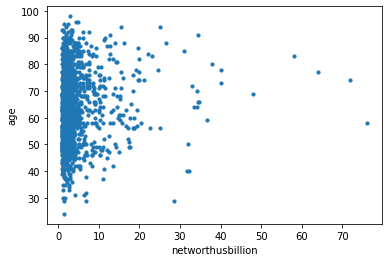

In [93]:
df.plot.scatter(x = 'networthusbillion', y = 'age', s = 10);


## 13) Make a bar graph of the wealth of the top 10 richest billionaires

> **TIP:** When you make your plot, you'll need to set the `x` and `y` or else your chart will look _crazy_
>
> **TIP:** x and y might be the opposite of what you expect them to be

<AxesSubplot:xlabel='name'>

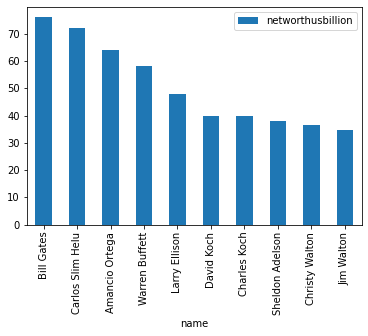

In [113]:
df.sort_values('networthusbillion', ascending = False).head(10).plot.bar(x='name', y='networthusbillion')